# Machine Learning - Linear Regression

## Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

## Import Data

In [2]:
def create_data(n_samples=1000):
    # Generate random values and noise
    x = np.random.randn(n_samples, 1)
    q = np.random.randn(n_samples, 1)*np.random.randn()
    Y = 2*x+ q
    return x, Y

In [3]:
%%time

X_train, Y_train = create_data(n_samples=100)
X_test, Y_test = create_data(n_samples=25)

CPU times: user 264 µs, sys: 254 µs, total: 518 µs
Wall time: 934 µs


## Model Training

In [4]:
class LinearRegression():
    def __init__(self):
        # Initialize model hyperparameters with random values at first
        self.slope = tf.Variable(5.0)
        self.intercept = tf.Variable(0.0)
        self.learning_rate = 0.01

    def __call__(self, X):
        # Make a prediction with the model on X input values
        return self.slope * X + self.intercept

    def train(self, X, Y, epochs=10):
        # Train the model on training data for epoch rounds over all dataset
        for epoch in range(epochs):
            self.train_step(X, Y)

    def train_step(self, X, Y):
        with tf.GradientTape() as tape:
            # Compute the loss value with the model on training data
            current_loss = self.loss_value(self(X), Y)
            # Compute gradient for hyperparameters of the model (slope and intercept)
            gradient_slope, gradient_intercept = tape.gradient(
                current_loss, [self.slope, self.intercept])
            # Update current model values by substracting gradients accordingly
            self.slope.assign_sub(self.learning_rate * gradient_slope)
            self.intercept.assign_sub(self.learning_rate * gradient_intercept)

    def loss_value(self, prediction, reality):
        # Compute the mean squared error between prediction and reality
        return tf.reduce_mean(tf.square(prediction - reality))

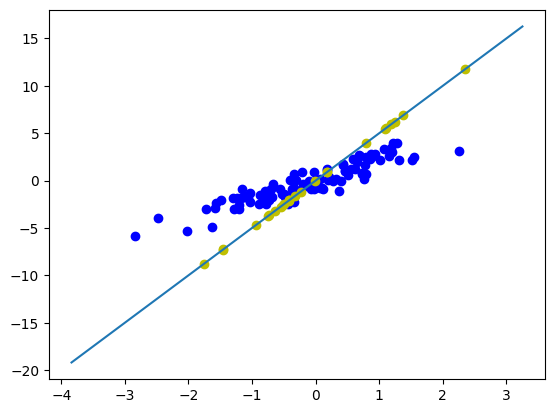

In [5]:
model = LinearRegression()
limits = [X_train.min()-1, X_train.max()+1]
plt.scatter(X_train, Y_train, c='b')
plt.plot(limits, model(limits))
plt.scatter(X_test, model(X_test), c='y')
plt.show()

In [6]:
%%time

model.train(X_train, Y_train, epochs=300)

CPU times: user 265 ms, sys: 2.17 ms, total: 267 ms
Wall time: 406 ms


## Model Testing

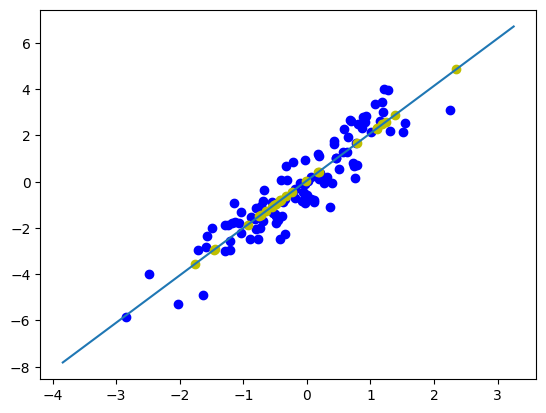

CPU times: user 336 ms, sys: 3.34 ms, total: 339 ms
Wall time: 221 ms


In [7]:
%%time

# Visualize again the model performances on testing data after being trained
plt.scatter(X_train, Y_train, c='b')
plt.plot(limits, model(limits))
plt.scatter(X_test, model(X_test), c='y')
plt.show()